# Task-1
### Import required libaries
### Read the csv file as pandas dataframe, display first 5 rows
### Check for null values and treat them accordingly
### Identify independent and dependent variables
### Plot scatter charts between the independent and dependent variables
### Split the data into train and test sets
### Train Linear Regression model with TV and sales columns

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [75]:
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [76]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Independent variables are TV,Radio, Newspaper. Dependent variable is Sales**

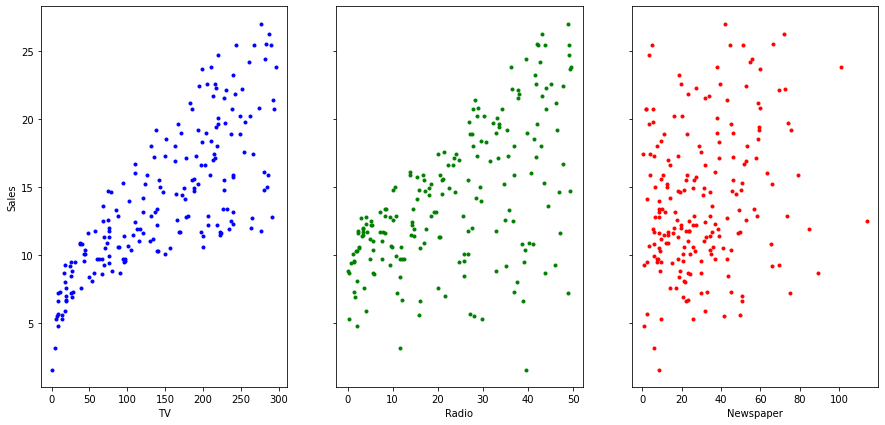

In [77]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.plot(data['TV'],data['Sales'],'b.')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.subplot(1, 3, 2)
plt.plot(data['Radio'],data['Sales'],'g.')
plt.xlabel('Radio')
plt.subplot(1, 3, 3)
plt.plot(data['Newspaper'],data['Sales'],'r.')
plt.xlabel('Newspaper')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = data['TV']
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print('Train size is', y_train.shape, 'Test size is', y_test.shape)

Train size is (160,) Test size is (40,)


In [80]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.intercept_, lin_reg.coef_

(array([7.11963843]), array([[0.04652973]]))

# Task 2

### Plot the straight line learnt by the model
### Predict the output values for the train and test data
### Print the MSE and R2 score of the model on the train and test data

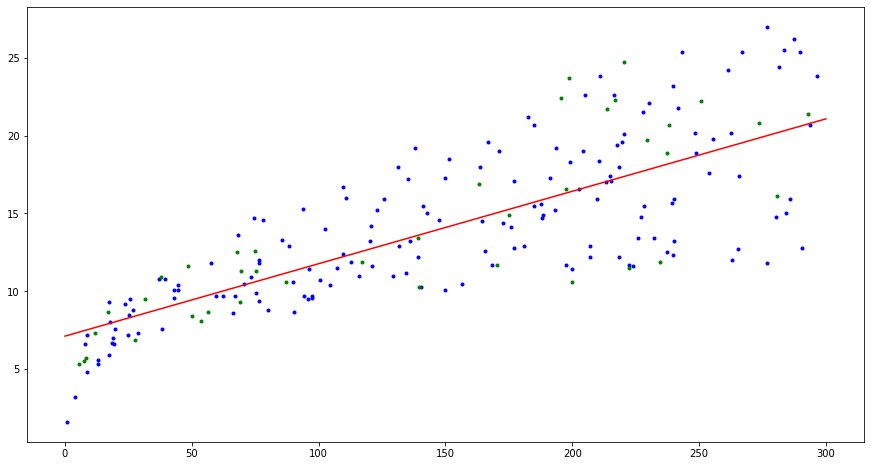

In [82]:
x = np.linspace(0,300,100)
m = lin_reg.coef_[0]
c = lin_reg.intercept_
y = (m * x) + c

plt.figure(figsize=(15,8))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'g.')
plt.plot(x, y, 'r-')
plt.show()

In [83]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print('Performance on Train data is', mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train))
print('\nPerformance on Test data is', mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test))

Performance on Train data is 10.603600570989268 0.5911667812043272

Performance on Test data is 10.204654118800956 0.6766954295627076


## Multiple Linear Regression

### Use all 3 features and train a Linear regression model using the SGDRegressor
### Predict the output values for the train and test data
### Print the MSE and R2 score of the model on the train and test data

In [84]:
from sklearn.linear_model import SGDRegressor

X = data[['TV','Radio','Newspaper']]
y = data['Sales']
X.head(), y.head()

(      TV  Radio  Newspaper
 1  230.1   37.8       69.2
 2   44.5   39.3       45.1
 3   17.2   45.9       69.3
 4  151.5   41.3       58.5
 5  180.8   10.8       58.4,
 1    22.1
 2    10.4
 3     9.3
 4    18.5
 5    12.9
 Name: Sales, dtype: float64)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [86]:
sgd_reg = SGDRegressor(max_iter=2000, penalty='l2', alpha=0.01, n_iter_no_change=30, eta0 = 0.02, random_state=1234)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.02, max_iter=2000, n_iter_no_change=30,
             random_state=1234)

In [87]:
sgd_reg.intercept_, sgd_reg.coef_

(array([5.94318882e+10]),
 array([-6.03180266e+10, -4.13709717e+10, -6.71368270e+10]))

In [88]:
y_pred_train = sgd_reg.predict(X_train)
y_pred_test = sgd_reg.predict(X_test)

print('Performance on Train data is', mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train))
print('\nPerformance on Test data is', mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test))

Performance on Train data is 1.7194778006517533e+26 -6.629631502826174e+24

Performance on Test data is 1.662970312647072e+26 -5.268634255714535e+24


In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(2.9790673381226256, array([0.04472952, 0.18919505, 0.00276111]))

In [90]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print('Performance on Train data is', mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train))
print('\nPerformance on Test data is', mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test))

Performance on Train data is 2.705129423081414 0.8957008271017817

Performance on Test data is 3.174097353976104 0.899438024100912


# Linear Regression with categorical variables

In [91]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [93]:
print(data['TV'].mean())
data['TV_cat'] = np.where(data['TV'] > data['TV'].mean(), 'Large', data['TV'])
data['TV_cat'] = np.where(data['TV'] <= data['TV'].mean(), 'Small', data['TV_cat'])
data.head()

147.0425


,TV,Radio,Newspaper,Sales,TV_cat
1,230.1,37.8,69.2,22.1,Large
2,44.5,39.3,45.1,10.4,Small
3,17.2,45.9,69.3,9.3,Small
4,151.5,41.3,58.5,18.5,Large
5,180.8,10.8,58.4,12.9,Large


In [94]:
X = data[['TV_cat','Radio','Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [95]:
from sklearn.preprocessing import LabelEncoder
enc1 = LabelEncoder()
enc1.fit(X_train['TV_cat'])
X_train['TV_cat'] = enc1.transform(X_train['TV_cat'])
X_test['TV_cat'] = enc1.transform(X_test['TV_cat'])
X_train[:5]

,TV_cat,Radio,Newspaper
80,1,7.7,23.1
198,0,9.3,6.4
39,1,26.7,35.1
25,1,12.6,18.3
123,0,2.4,15.6


In [96]:
enc1.classes_

array(['Large', 'Small'], dtype=object)

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(12.596774589581038, array([-6.25343153,  0.18678227,  0.00801213]))

In [98]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print('Performance on Train data is', mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train))
print('\nPerformance on Test data is', mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test))

Performance on Train data is 7.120504700391324 0.725461286793915

Performance on Test data is 8.584765670165131 0.7280168494702814


## Effect of feature Scaling

In [99]:
price = pd.read_csv('House_price_feature_Scaling.csv')
price.head()

,Unnamed: 0,Bedrooms,SquareFootage,AgeOfHouse,HousePrice
0,0,4,2982,20,257100
1,1,5,1000,32,171800
2,2,3,2663,7,227450
3,3,5,1579,41,199850
4,4,5,1302,33,186800


In [101]:
X = price[['Bedrooms','SquareFootage','AgeOfHouse']]
y = price['HousePrice']
X.head(), y.head()

(   Bedrooms  SquareFootage  AgeOfHouse
 0         4           2982          20
 1         5           1000          32
 2         3           2663           7
 3         5           1579          41
 4         5           1302          33,
 0    257100
 1    171800
 2    227450
 3    199850
 4    186800
 Name: HousePrice, dtype: int64)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [104]:
# Linear Regression Model without Feature scaling
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

print(mean_squared_error(y_test, lin_reg.predict(X_test)))

50000.0 [15000.    50.  -100.]
2.964615315390051e-22


In [105]:
# Linear Regression Model with Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train[:5], X_train_scaled[:5])
X_test_scaled = scaler.transform(X_test)

lin_reg_scale = LinearRegression()
lin_reg_scale.fit(X_train_scaled, y_train)

print(lin_reg_scale.intercept_, lin_reg_scale.coef_)

print(mean_squared_error(y_test, lin_reg_scale.predict(X_test_scaled)))

    Bedrooms  SquareFootage  AgeOfHouse
55         1           2057          18
88         4           2730          21
26         3           2557          48
42         4           2838          11
69         4            801          20 [[-1.52314903  0.07992474 -0.64107581]
 [ 0.69234047  1.18471242 -0.43701985]
 [-0.04615603  0.90071797  1.3994838 ]
 [ 0.69234047  1.36200376 -1.11720639]
 [ 0.69234047 -1.98190785 -0.5050385 ]]
193610.625 [20311.53843878 30458.34101046 -1470.18493735]
4.658681209898652e-22
